In [1]:
library(edgeR)
library(Seurat)

decideTests.DGEExact <- decideTests.DGELRT <- function(object,adjust.method="BH",p.value=0.05,lfc=0,...)
{
	decideTestsDGE(object=object,adjust.method=adjust.method,p.value=p.value,lfc=lfc)
}

decideTestsDGE <- function(object,adjust.method="BH",p.value=0.05,lfc=0)
#	Accept or reject hypothesis tests across genes and contrasts
#	edgeR team. Original author was Davis McCarthy.
#	Created 15 August 2010. Last modified 15 July 2018.
{
#	Check object class
	if( !(is(object,"DGEExact") || is(object,"DGELRT")) ) stop("Need DGEExact or DGELRT object")

#	Apply multiple testing
	p <- object$table$PValue
	p <- p.adjust(p, method=adjust.method)
	isDE <- as.integer(p < p.value)

#	Extract logFC
	logFC <- object$table$logFC

#	Check for F-test with multiple logFC columns
	FTest <- is.null(logFC)

#	With multiple contrasts, apply lfc threshold to maximum logFC
	if(FTest) {
		if(lfc>0) {
			coef.col <- grep("^logFC",colnames(object$table))
			logFC <- object$table[,coef.col]
			SmallFC <- rowSums(abs(logFC) >= lfc) == 0
			isDE[SmallFC] <- 0L
		}

#	With single contrast, apply directionality and lfc threshold
	} else {
		isDE[isDE & logFC<0] <- -1L
		SmallFC <- (abs(logFC) < lfc)
		isDE[SmallFC] <- 0L
	}

#	Assemble TestResults object
	isDE <- matrix(isDE, ncol=1)
	row.names(isDE) <- row.names(object)
	colnames(isDE) <- paste(rev(object$comparison),collapse="-")

#	Record possible values
	if(FTest) {
		attr(isDE,"levels") <- c(0L,1L)
		attr(isDE,"labels") <- c("NotSig","Sig")
	} else {
		attr(isDE,"levels") <- c(-1L,0L,1L)
		attr(isDE,"labels") <- c("Down","NotSig","Up")
	}		

	new("TestResults", isDE)
}

Loading required package: limma

Warning message:
“package ‘Seurat’ was built under R version 4.4.1”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.4.1”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.4.1”
‘SeuratObject’ was built with package ‘Matrix’ 1.6.5 but the current
version is 1.7.1; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [3]:
getwd()

[1] "/scratch/project_mnt/S0010/Prakrithi/lnc_revision"

In [2]:
setwd("/QRISdata/Q4386/V2_sc_Mel_acral_cutaneous")
#setwd("V2_sc_Mel_acral_cutaneous")

In [16]:
library(edgeR)
so<-readRDS("/QRISdata/Q4386/Supplementary/v2_combined_seurat_obj.rds")
DefaultAssay(so)<"RNA"
# Step 1: Load the mapping file
mapping <- read.table("uTAR_to_cuTAR_ID_rename", header = FALSE, sep = "\t", stringsAsFactors = FALSE)
# Step 2: Create a named vector mapping old uTAR IDs to new uTAR IDs
rename_map <- setNames(mapping$V2, mapping$V1)
# Step 3: Extract the current rownames from the Seurat object
current_rownames <- rownames(so@assays$RNA@counts)
# Step 4: Identify the uTAR genes in the current rownames
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
# Step 5: Create a new vector of rownames with the updated names
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
# Step 6: Update the rownames in the Seurat object
rownames(so@assays$RNA@counts) <- new_rownames
#rownames(so@assays$RNA@data) <- new_rownames
#rownames(so@assays$RNA@scale.data)<- new_rownames
# Step 7: Verify the changes

###
current_rownames <- rownames(so@assays$RNA@data)
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
rownames(so@assays$RNA@data) <- new_rownames



current_rownames <- rownames(so@assays$RNA@scale.data)
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
rownames(so@assays$RNA@scale.data) <- new_rownames
#####

[1] TRUE

In [22]:
#cuTARs_list <- read.table("cuTARs_list.txt", header = TRUE, stringsAsFactors = FALSE)$GENE


In [23]:
write.table(rownames(so@assays$RNA@counts),"v2_mel_cutars_list.txt",quote = FALSE, row.names = FALSE)
so

An object of class Seurat 
36853 features across 33524 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [11]:
getwd()

[1] "/QRISdata/Q4386/V2_sc_Mel_acral_cutaneous"

[1] TRUE

Warning message:
“Count matrix has duplicated rownames”


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   16265   263536  1065179  5587675  3349359 62589626 

keep.samples
FALSE  TRUE 
    1    49 

[1] 0.3017323

[1] 0.3017323

,B cells,CD8+ NKT-like cells,Cycling Melanoma,Endothelial cells,Fibroblasts,Melanoma,Memory CD4+ T-cells,Monocytes,NK cells,Unknown
Int,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
CD8+ NKT-like cells,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111
Cycling Melanoma,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111
Endothelial cells,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111
Fibroblasts,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111
Melanoma,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111,-0.1111111
Memory CD4+ T-cells,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111,-0.1111111
Monocytes,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111,-0.1111111
NK cells,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000,-0.1111111
Unknown,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,-0.1111111,1.0000000


,B cells_vs_others,CD8+ NKT-like cells_vs_others,Cycling Melanoma_vs_others,Endothelial cells_vs_others,Fibroblasts_vs_others,Melanoma_vs_others,Memory CD4+ T-cells_vs_others,Monocytes_vs_others,NK cells_vs_others,Unknown_vs_others
Down,20,3,27,15,14,33,5,12,15,0
NotSig,1233,1178,620,969,973,479,1147,1194,1236,1250
Up,3,75,609,272,269,744,104,50,5,6


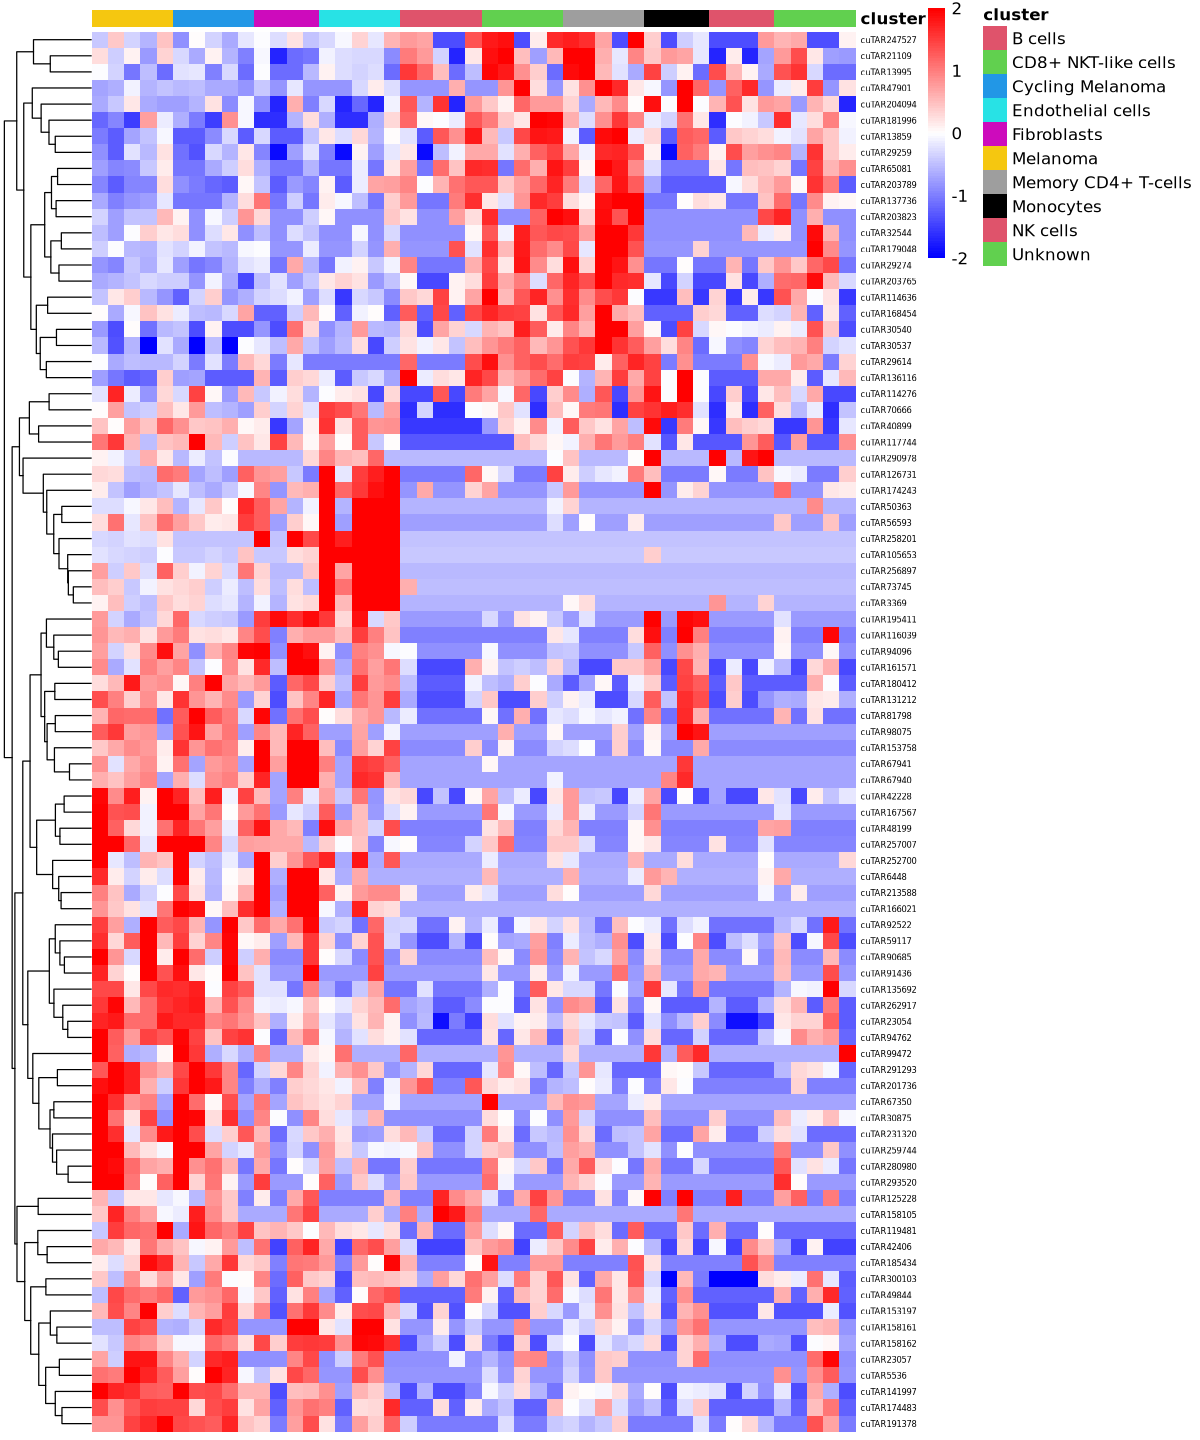

In [ ]:
y<-Seurat2PB(so,sample="orig.ident",cluster="gene_cell_types")
summary(y$samples$lib.size)

keep.samples<-y$samples$lib.size > 50000 
table(keep.samples) 
#mel_samples<-c("Post Treatment_clusterMelanoma","Post Treatment_clusterCycling Melanoma","Pre Treatment_clusterCycling Melanoma","Pre Treatment_clusterMelanoma") 

#y<-y[,keep.samples]
#Keep only uTARs for DE analysis. Skip to calculate FC for gene-co-exp
uTARs <- rownames(y)[grep("^cuTAR", rownames(y))]
cuTARs_list <- read.table("cuTARs_list.txt", header = TRUE, stringsAsFactors = FALSE)$GENE
uTARs<-intersect(uTARs,cuTARs_list)
y<-y[uTARs,,keep=FALSE]

#normalization
y<-normLibSizes(y)

#MDS plots
cluster<-as.factor(y$samples$cluster) 
#design matrix
donor<-factor(y$sample$sample)
design<-model.matrix(~cluster+donor)
colnames(design)<-gsub("donor","",colnames(design))
colnames(design)<-gsub("cluster","",colnames(design))
colnames(design)[1]<-"Int"

#dispersion estimates
#Dispersion Estimation
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g


fit<-glmQLFit(y,design,robust=TRUE) 


## Marker gene identification
ncls<-nlevels(cluster) 
contr<-rbind(matrix(1/(1-ncls),ncls,ncls), +matrix(0,ncol(design)-ncls,ncls)) 
diag(contr)<-1 
contr[1,]<-0 
rownames(contr)<-colnames(design) 
colnames(contr)<-levels(cluster)
contr

# Qasi-likelihood f-test for each comprison
qlf<-list() 
for(i in 1:ncls){ 
  qlf[[i]]<-glmQLFTest(fit,contrast=contr[,i]) 
  qlf[[i]]$comparison<-paste0(levels(cluster)[i],"_vs_others") 
}

non_mel<-c("B cells","CD8+ NKT-like cells","Endothelial cells","Fibroblasts","Memory CD4+ T-cells","Monocytes","NK cells")        
mel<-c("Cycling Melanoma","Melanoma")


#No.of DE genes for each comparison
dt<-lapply(lapply(qlf,decideTestsDGE),summary) 
dt.all<-do.call("cbind",dt) 
head(dt.all)
#write.table(dt.all,"cluster_wise_uTAR_stats.txt",sep="\t",quote=FALSE,row.names=TRUE)


# Top 20 DE uTARs per cluster
top<-10
topMarkers<-list()
for(i in 1:ncls){ 
  ord<-order(qlf[[i]]$table$PValue,decreasing=FALSE) 
  up<-qlf[[i]]$table$logFC>0 
  topMarkers[[i]]<-rownames(y)[ord[up][1:top]] 
} 
topMarkers<-unique(unlist(topMarkers)) 
#write.table(topMarkers,"topmarkers_edger.txt",sep="\t",row.names = TRUE, quote = FALSE)


# Heat Map
lcpm<-cpm(y,log=TRUE) 
annot<-data.frame(cluster=cluster) 
rownames(annot)<-colnames(y) 
ann_colors<-list(cluster=2:11) 
names(ann_colors$cluster)<-levels(cluster)

options(repr.plot.width = 10, repr.plot.height = 12)
colnames(lcpm)<-gsub("cluster","",colnames(lcpm))



o<-read.csv("order_to_keep_pheatmap.txt",sep="\t",header=FALSE)
desired_order<-o$V1
lcpm_o <- lcpm[,match(desired_order, colnames(lcpm)), drop = FALSE]


rownames(annot)<-gsub("cluster","",rownames(annot))
annot_o <- annot[match(desired_order, rownames(annot)), , drop = FALSE]




pheatmap::pheatmap(lcpm_o[topMarkers,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
#grid.text(levels(annot_o$cluster), x = c(0.25, 0.6), y = c(0.89, 0.89),gp = gpar(fontsize = 10, rot = 45))

In [22]:
length(uTARs)

[1] 1256

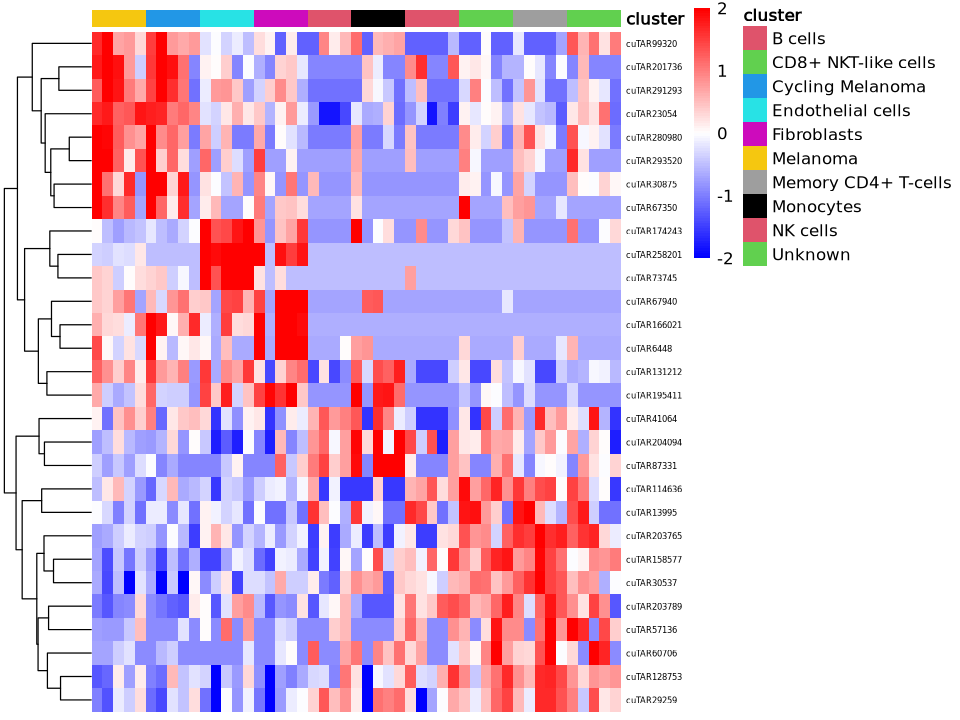

In [7]:
options(repr.plot.width = 8, repr.plot.height = 6)

old<-c("cuTAR114636","cuTAR128753","cuTAR131212","cuTAR13995","cuTAR158577","cuTAR166021","cuTAR174243","cuTAR195411","cuTAR201736","cuTAR203765","cuTAR203789","cuTAR204094","cuTAR23054","cuTAR258201","cuTAR280980","cuTAR291293","cuTAR29259","cuTAR293520","cuTAR30537","cuTAR30875","cuTAR41064","cuTAR57136","cuTAR60706","cuTAR6448","cuTAR67350","cuTAR67940","cuTAR73745","cuTAR87331","cuTAR99320")
pheatmap::pheatmap(lcpm_o[old,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)


In [23]:
intersect(topMarkers,old)

[1] "cuTAR114636" "cuTAR67350"  "cuTAR23054"  "cuTAR30875"  "cuTAR291293"
 [6] "cuTAR73745"  "cuTAR258201" "cuTAR174243" "cuTAR6448"   "cuTAR67940" 
[11] "cuTAR166021" "cuTAR280980" "cuTAR293520" "cuTAR30537"  "cuTAR13995" 
[16] "cuTAR195411" "cuTAR204094" "cuTAR131212" "cuTAR201736" "cuTAR203789"
[21] "cuTAR203765" "cuTAR29259"

In [25]:
length(old)
length(intersect(topMarkers,old))

[1] 29

[1] 3

In [34]:
length(unique(so$gene_cell_types))

[1] 10

In [35]:
names(combined_top_genes)

[1] "gene"   "logFC"  "logCPM" "F"      "PValue" "FDR"    "gene"   "logFC" 
 [9] "logCPM" "F"      "PValue" "FDR"    "gene"   "logFC"  "logCPM" "F"     
[17] "PValue" "FDR"    "gene"   "logFC"  "logCPM" "F"      "PValue" "FDR"   
[25] "gene"   "logFC"  "logCPM" "F"      "PValue" "FDR"    "gene"   "logFC" 
[33] "logCPM" "F"      "PValue" "FDR"    "gene"   "logFC"  "logCPM" "F"     
[41] "PValue" "FDR"    "gene"   "logFC"  "logCPM" "F"      "PValue" "FDR"   
[49] "gene"   "logFC"  "logCPM" "F"      "PValue" "FDR"    "gene"   "logFC" 
[57] "logCPM" "F"      "PValue" "FDR"

Total Upregulated Genes Selected: 71 


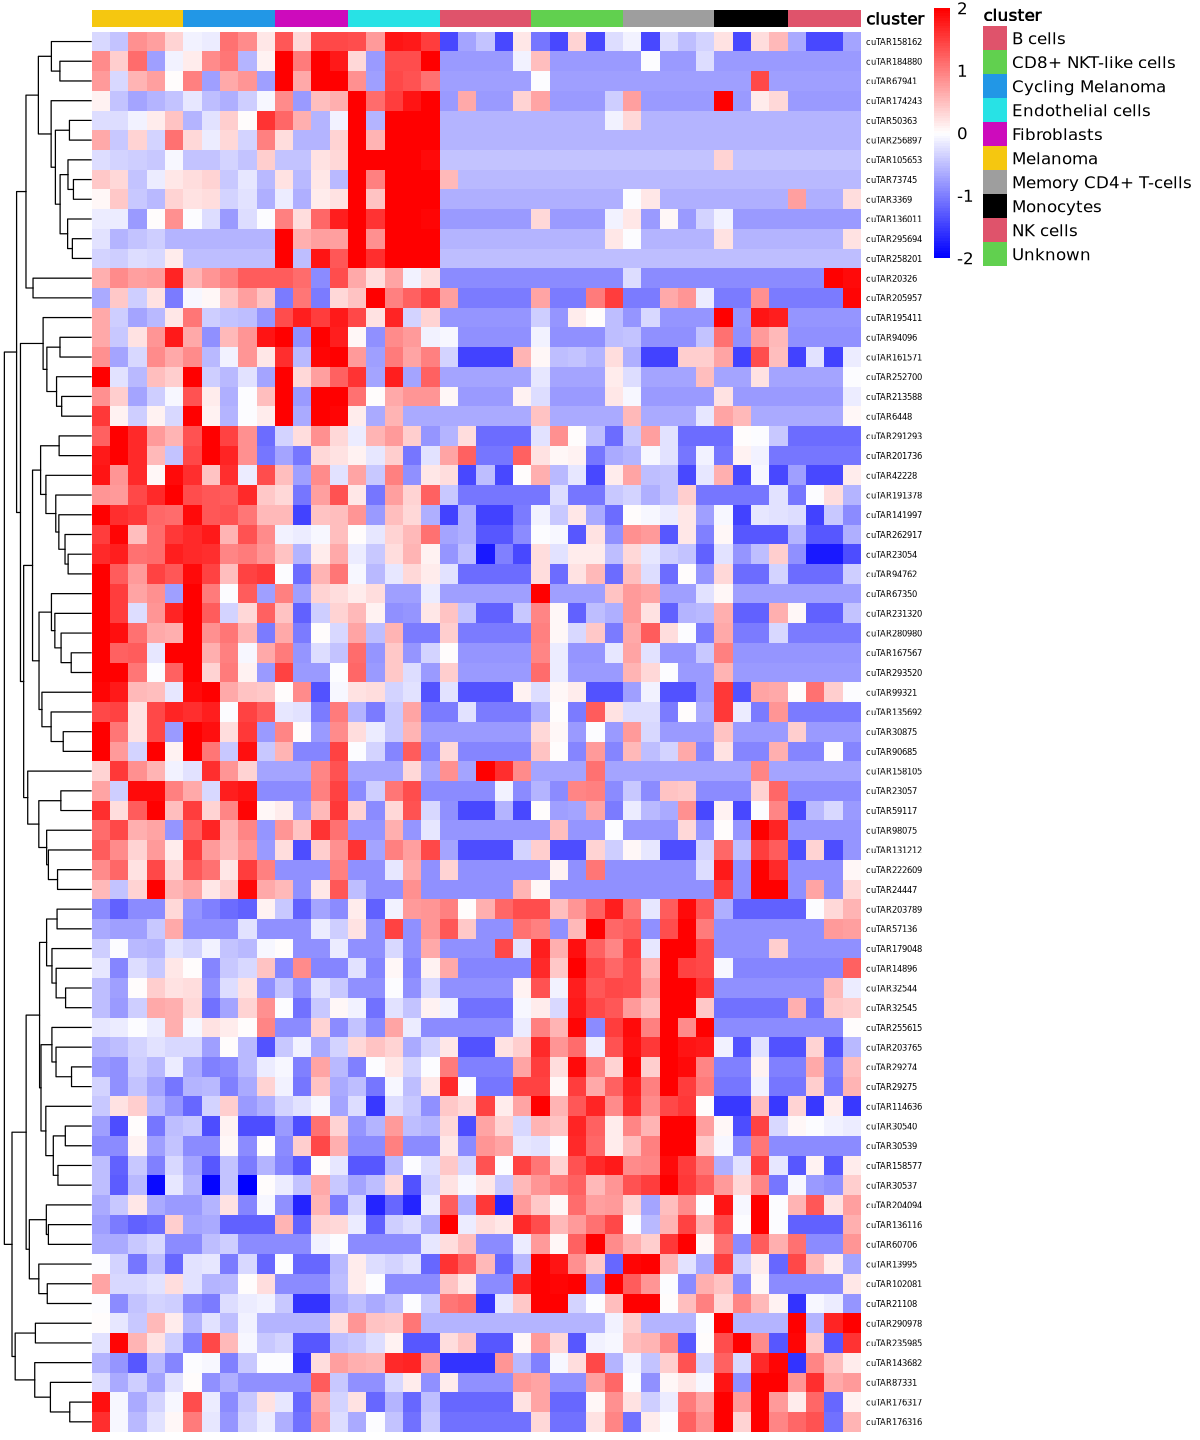

In [136]:
# Define thresholds
logFC_threshold <- 1  # Fold change threshold
fdr_threshold <- 0.05 # FDR threshold

# Initialize an empty vector for upregulated genes
up <- c()

# Process each qlf result from 1 to 10
for (i in 1:10) {
  # Adjust FDR
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  
  # Add significance classification
  qlf[[i]]$table$Significance <- with(qlf[[i]]$table, 
    ifelse(FDR < fdr_threshold & logFC > logFC_threshold, "Upregulated",
    ifelse(FDR < fdr_threshold & logFC < -logFC_threshold, "Downregulated", "Not Significant")))

  # Select upregulated genes
  upregulated_genes <- qlf[[i]]$table[qlf[[i]]$table$Significance == "Upregulated", ]
  
  # Get top 10 based on lowest FDR and highest logFC
  top_genes <- rownames(upregulated_genes[order(upregulated_genes$FDR, -upregulated_genes$logFC), ][1:10, ])
  
  # Append to up while ensuring uniqueness
  up <- unique(c(up, top_genes))
}
up <- intersect(up, rownames(lcpm_o))
# Check the number of selected upregulated genes
cat("Total Upregulated Genes Selected:", length(up), "\n")

# Generate heatmap if there are upregulated genes
if (length(up) > 0) {
  pheatmap::pheatmap(lcpm_o[up,-c(43:50)],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,#cluster_rows=FALSE,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
} else {
  cat("No upregulated genes found.")
}


In [128]:
colnames(lcpm_o)

[1] "Acral1_Melanoma"                "Acral2_Melanoma"               
 [3] "Acral5_Melanoma"                "Acral6_Melanoma"               
 [5] "Cutaneous1_Melanoma"            "Acral1_Cycling Melanoma"       
 [7] "Acral2_Cycling Melanoma"        "Acral5_Cycling Melanoma"       
 [9] "Acral6_Cycling Melanoma"        "Cutaneous1_Cycling Melanoma"   
[11] "Acral1_Fibroblasts"             "Acral2_Fibroblasts"            
[13] "Acral5_Fibroblasts"             "Acral6_Fibroblasts"            
[15] "Acral1_Endothelial cells"       "Acral2_Endothelial cells"      
[17] "Acral5_Endothelial cells"       "Acral6_Endothelial cells"      
[19] "Cutaneous1_Endothelial cells"   "Acral1_NK cells"               
[21] "Acral2_NK cells"                "Acral5_NK cells"               
[23] "Acral6_NK cells"                "Cutaneous1_NK cells"           
[25] "Acral1_CD8+ NKT-like cells"     "Acral2_CD8+ NKT-like cells"    
[27] "Acral5_CD8+ NKT-like cells"     "Acral6_CD8+ NKT-like cells"    
[29] "Cutaneous1_CD8+ NKT-like cells" "Acral1_Memory CD4+ T-cells"    
[31] "Acral2_Memory CD4+ T-cells"     "Acral5_Memory CD4+ T-cells"    
[33] "Acral6_Memory CD4+ T-cells"     "Cutaneous1_Memory CD4+ T-cells"
[35] "Acral1_Monocytes"               "Acral2_Monocytes"              
[37] "Acral5_Monocytes"               "Acral6_Monocytes"              
[39] "Acral1_B cells"                 "Acral5_B cells"                
[41] "Acral6_B cells"                 "Cutaneous1_B cells"            
[43] "Acral1_Unknown"                 "Acral2_Unknown"                
[45] "Acral5_Unknown"                 "Acral6_Unknown"                
[47] "Cutaneous1_Unknown"

pdf 
  2

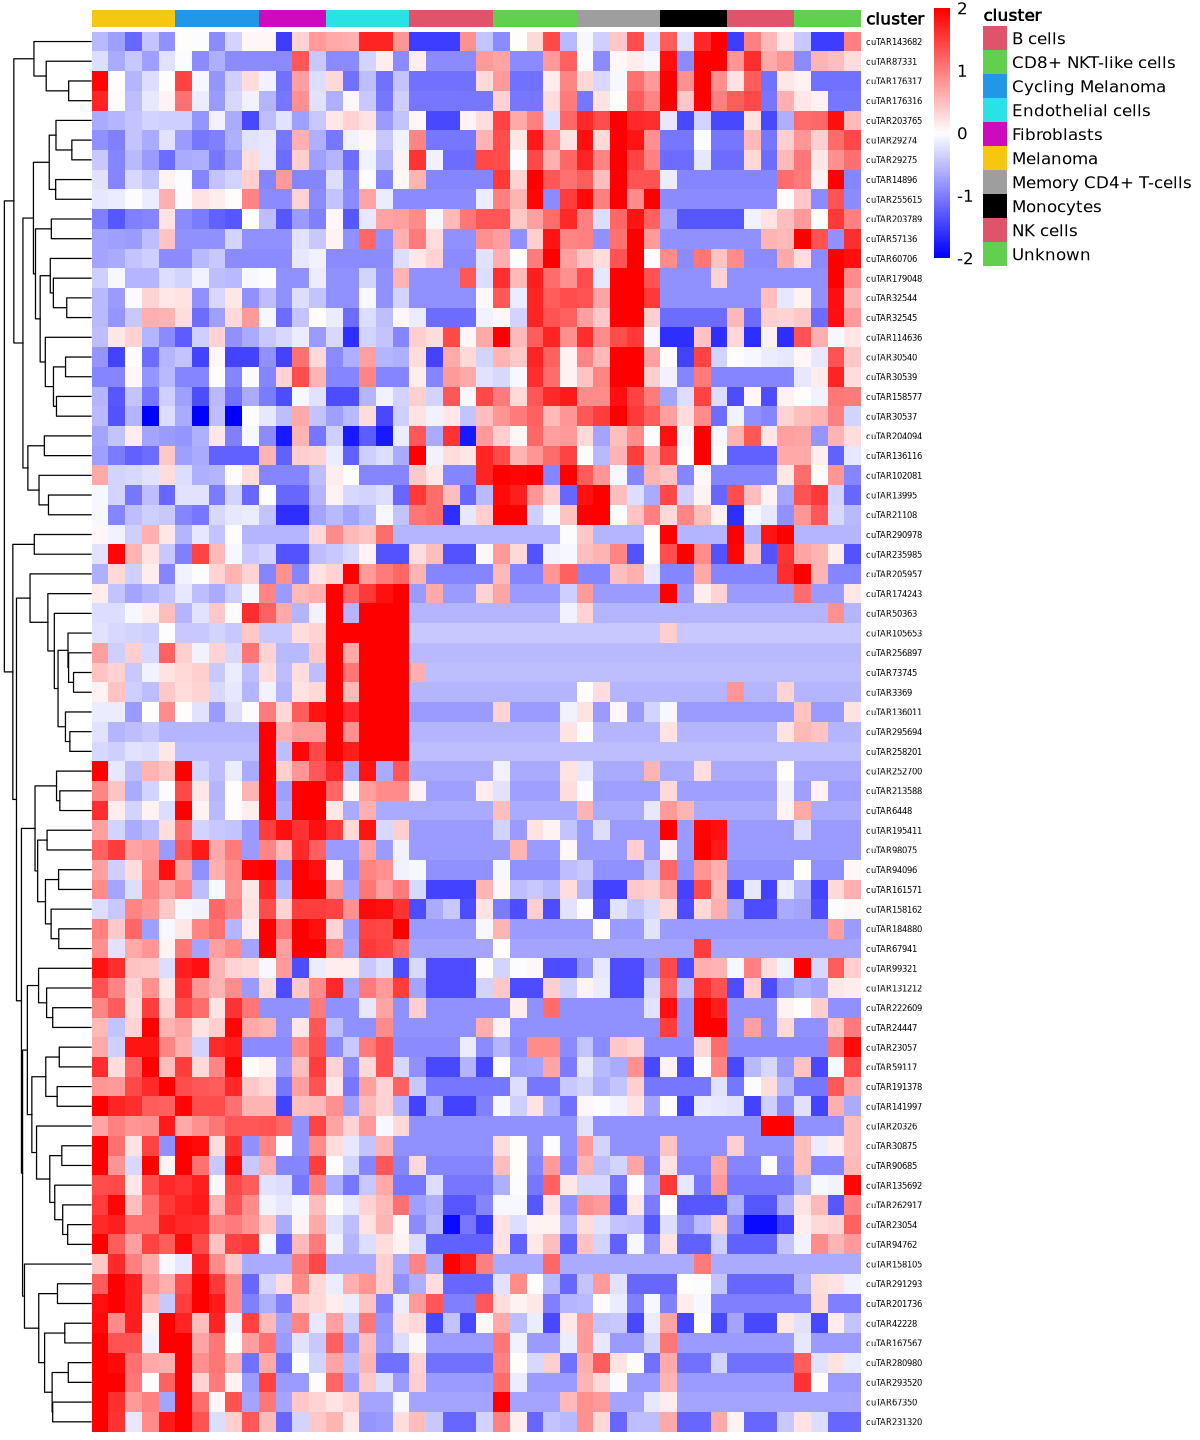

In [157]:
hm<-pheatmap::pheatmap(lcpm_o[up,-c(47:50)], breaks=seq(-2,2,length.out=101),
                   color=colorRampPalette(c("blue","white","red"))(100),
                   scale="row",
                   cluster_cols=FALSE, border_color=NA, fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o, annotation_colors=ann_colors)
pdf("CT_HM_ordered_final.pdf", width=10, height=12)
hm
dev.off()  # Ensure this is run properly


In [ ]:
genes_on_heatmap

In [131]:
colnames(lcpm_o[up,-c(46:50)])

[1] "Acral1_Melanoma"                "Acral2_Melanoma"               
 [3] "Acral5_Melanoma"                "Acral6_Melanoma"               
 [5] "Cutaneous1_Melanoma"            "Acral1_Cycling Melanoma"       
 [7] "Acral2_Cycling Melanoma"        "Acral5_Cycling Melanoma"       
 [9] "Acral6_Cycling Melanoma"        "Cutaneous1_Cycling Melanoma"   
[11] "Acral1_Fibroblasts"             "Acral2_Fibroblasts"            
[13] "Acral5_Fibroblasts"             "Acral6_Fibroblasts"            
[15] "Acral1_Endothelial cells"       "Acral2_Endothelial cells"      
[17] "Acral5_Endothelial cells"       "Acral6_Endothelial cells"      
[19] "Cutaneous1_Endothelial cells"   "Acral1_NK cells"               
[21] "Acral2_NK cells"                "Acral5_NK cells"               
[23] "Acral6_NK cells"                "Cutaneous1_NK cells"           
[25] "Acral1_CD8+ NKT-like cells"     "Acral2_CD8+ NKT-like cells"    
[27] "Acral5_CD8+ NKT-like cells"     "Acral6_CD8+ NKT-like cells"    
[29] "Cutaneous1_CD8+ NKT-like cells" "Acral1_Memory CD4+ T-cells"    
[31] "Acral2_Memory CD4+ T-cells"     "Acral5_Memory CD4+ T-cells"    
[33] "Acral6_Memory CD4+ T-cells"     "Cutaneous1_Memory CD4+ T-cells"
[35] "Acral1_Monocytes"               "Acral2_Monocytes"              
[37] "Acral5_Monocytes"               "Acral6_Monocytes"              
[39] "Acral1_B cells"                 "Acral5_B cells"                
[41] "Acral6_B cells"                 "Cutaneous1_B cells"            
[43] "Acral1_Unknown"                 "Acral2_Unknown"                
[45] "Acral5_Unknown"

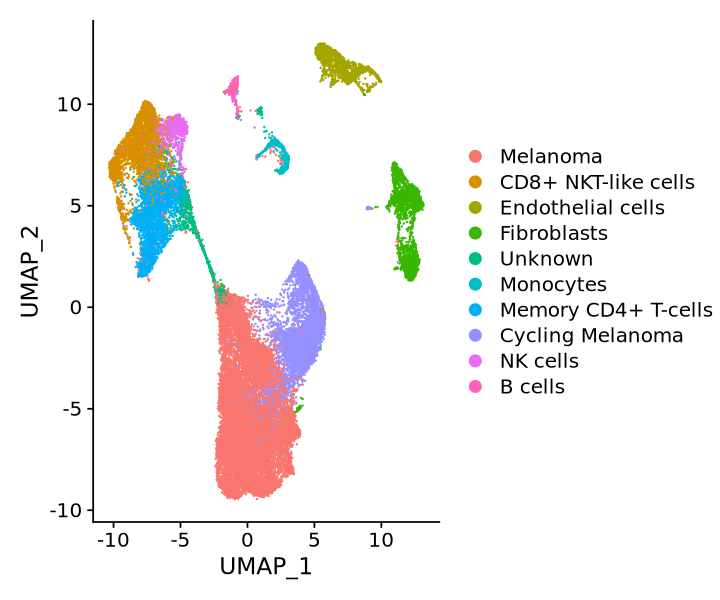

In [104]:
DimPlot(so)

Warning message:
“Could not find cuTAR141997 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR105653 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR213588 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR290978 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR87331 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR114636 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR141997 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR105653 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR213588 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not f

pdf 
  2

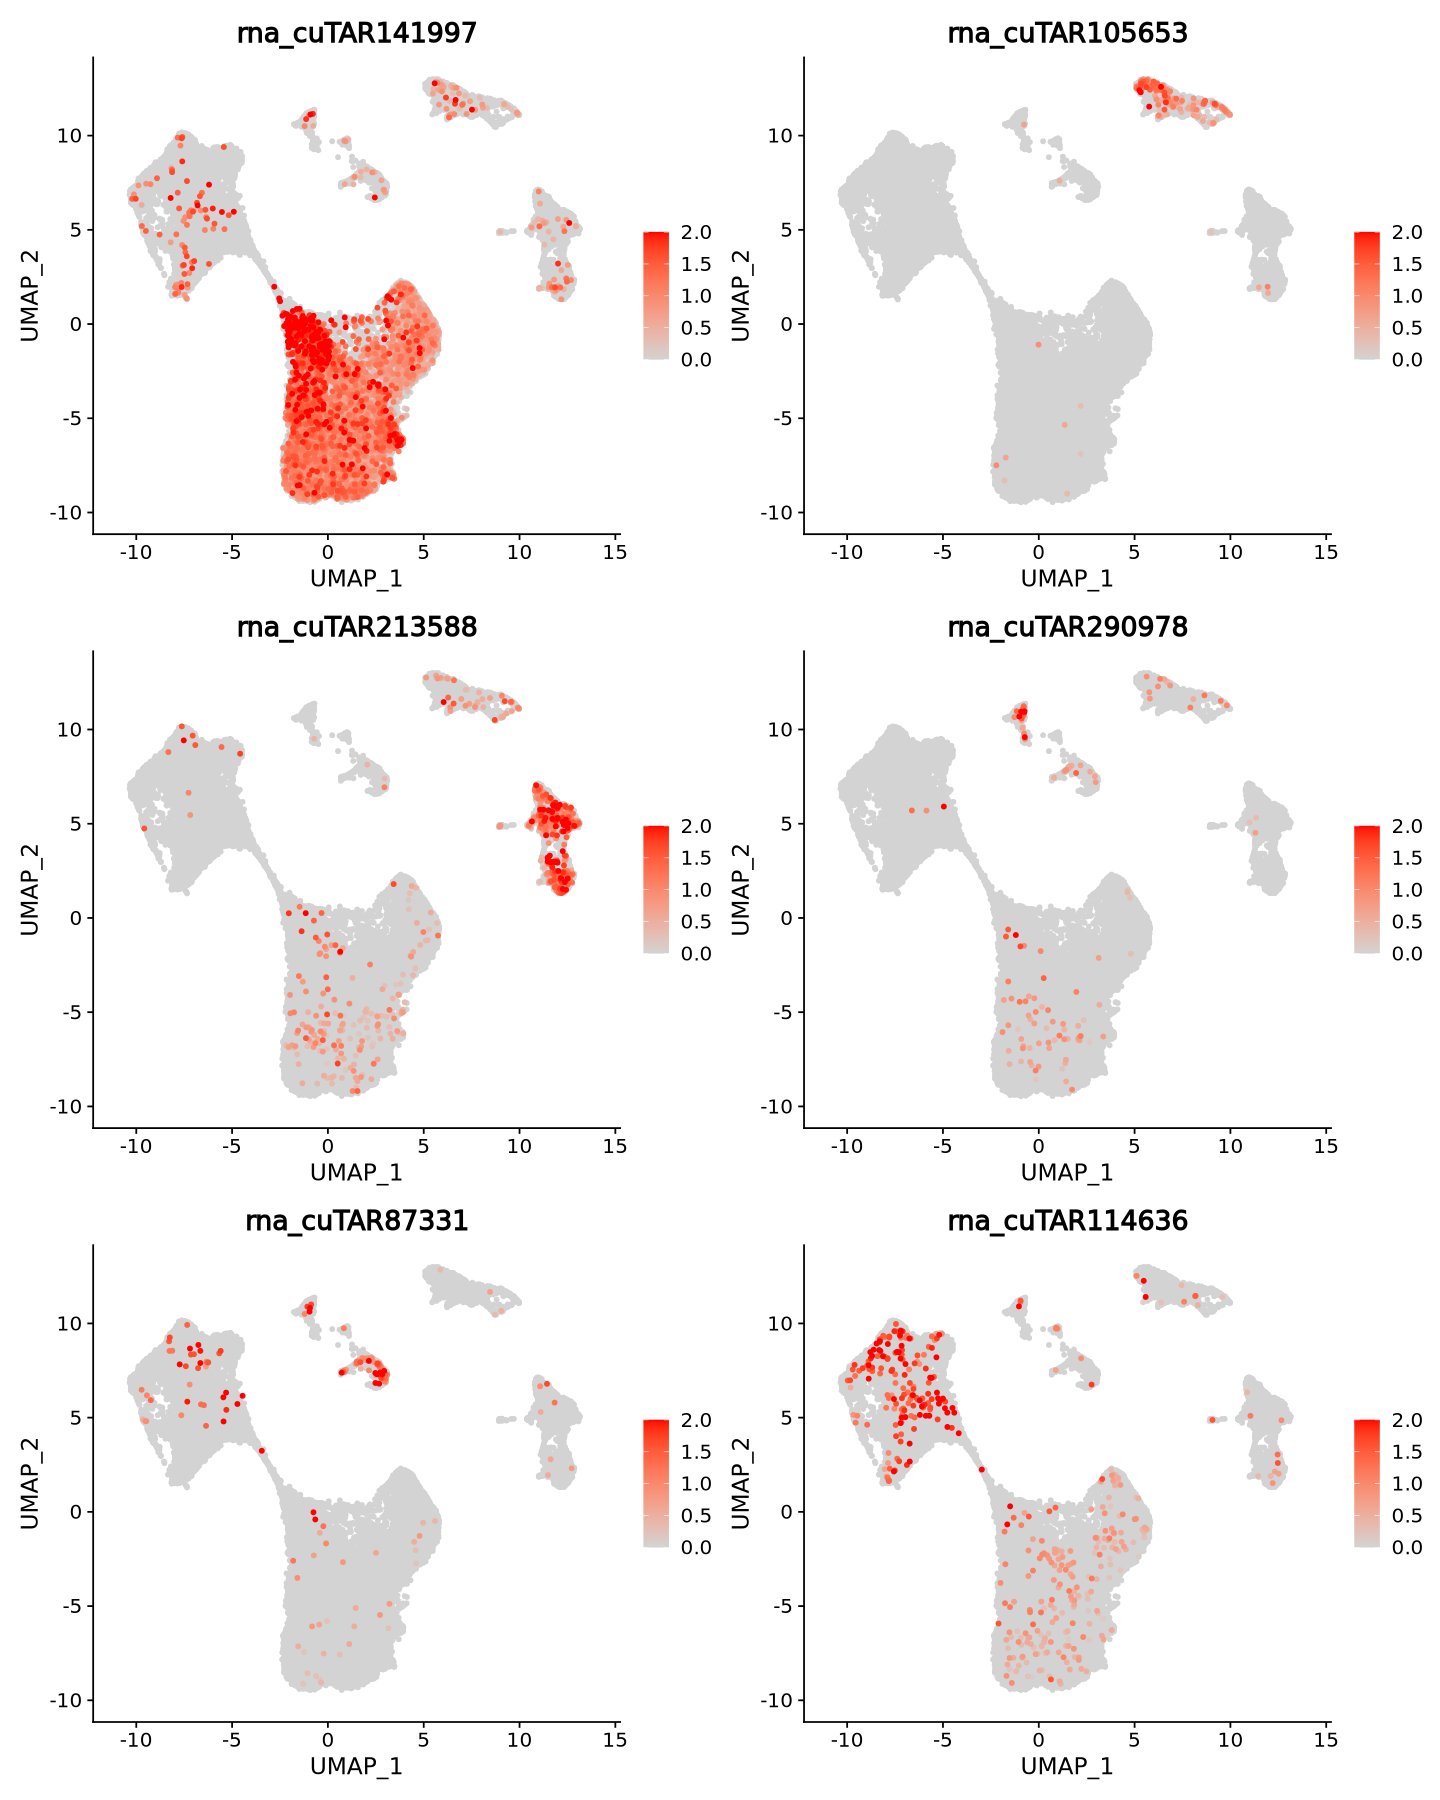

In [124]:
options(repr.plot.width = 12, repr.plot.height = 15)
FeaturePlot(so,features = c("cuTAR141997","cuTAR105653","cuTAR213588","cuTAR290978","cuTAR87331","cuTAR114636"), #cuTAR25417 replaced
               pt.size=1, order=TRUE, cols = c("lightgrey", "red"), max.cutoff=2)

p<-FeaturePlot(so,features = c("cuTAR141997","cuTAR105653","cuTAR213588","cuTAR290978","cuTAR87331","cuTAR114636"),
               pt.size=1, order=TRUE, cols = c("lightgrey", "red"), max.cutoff=2)

pdf("feature_plots_new.pdf",width = 12, height = 15)
p
dev.off()

Warning message:
“Could not find cuTAR141997 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR105653 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR213588 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR290978 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR176317 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR32544 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR141997 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR105653 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR213588 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not f

pdf 
  2

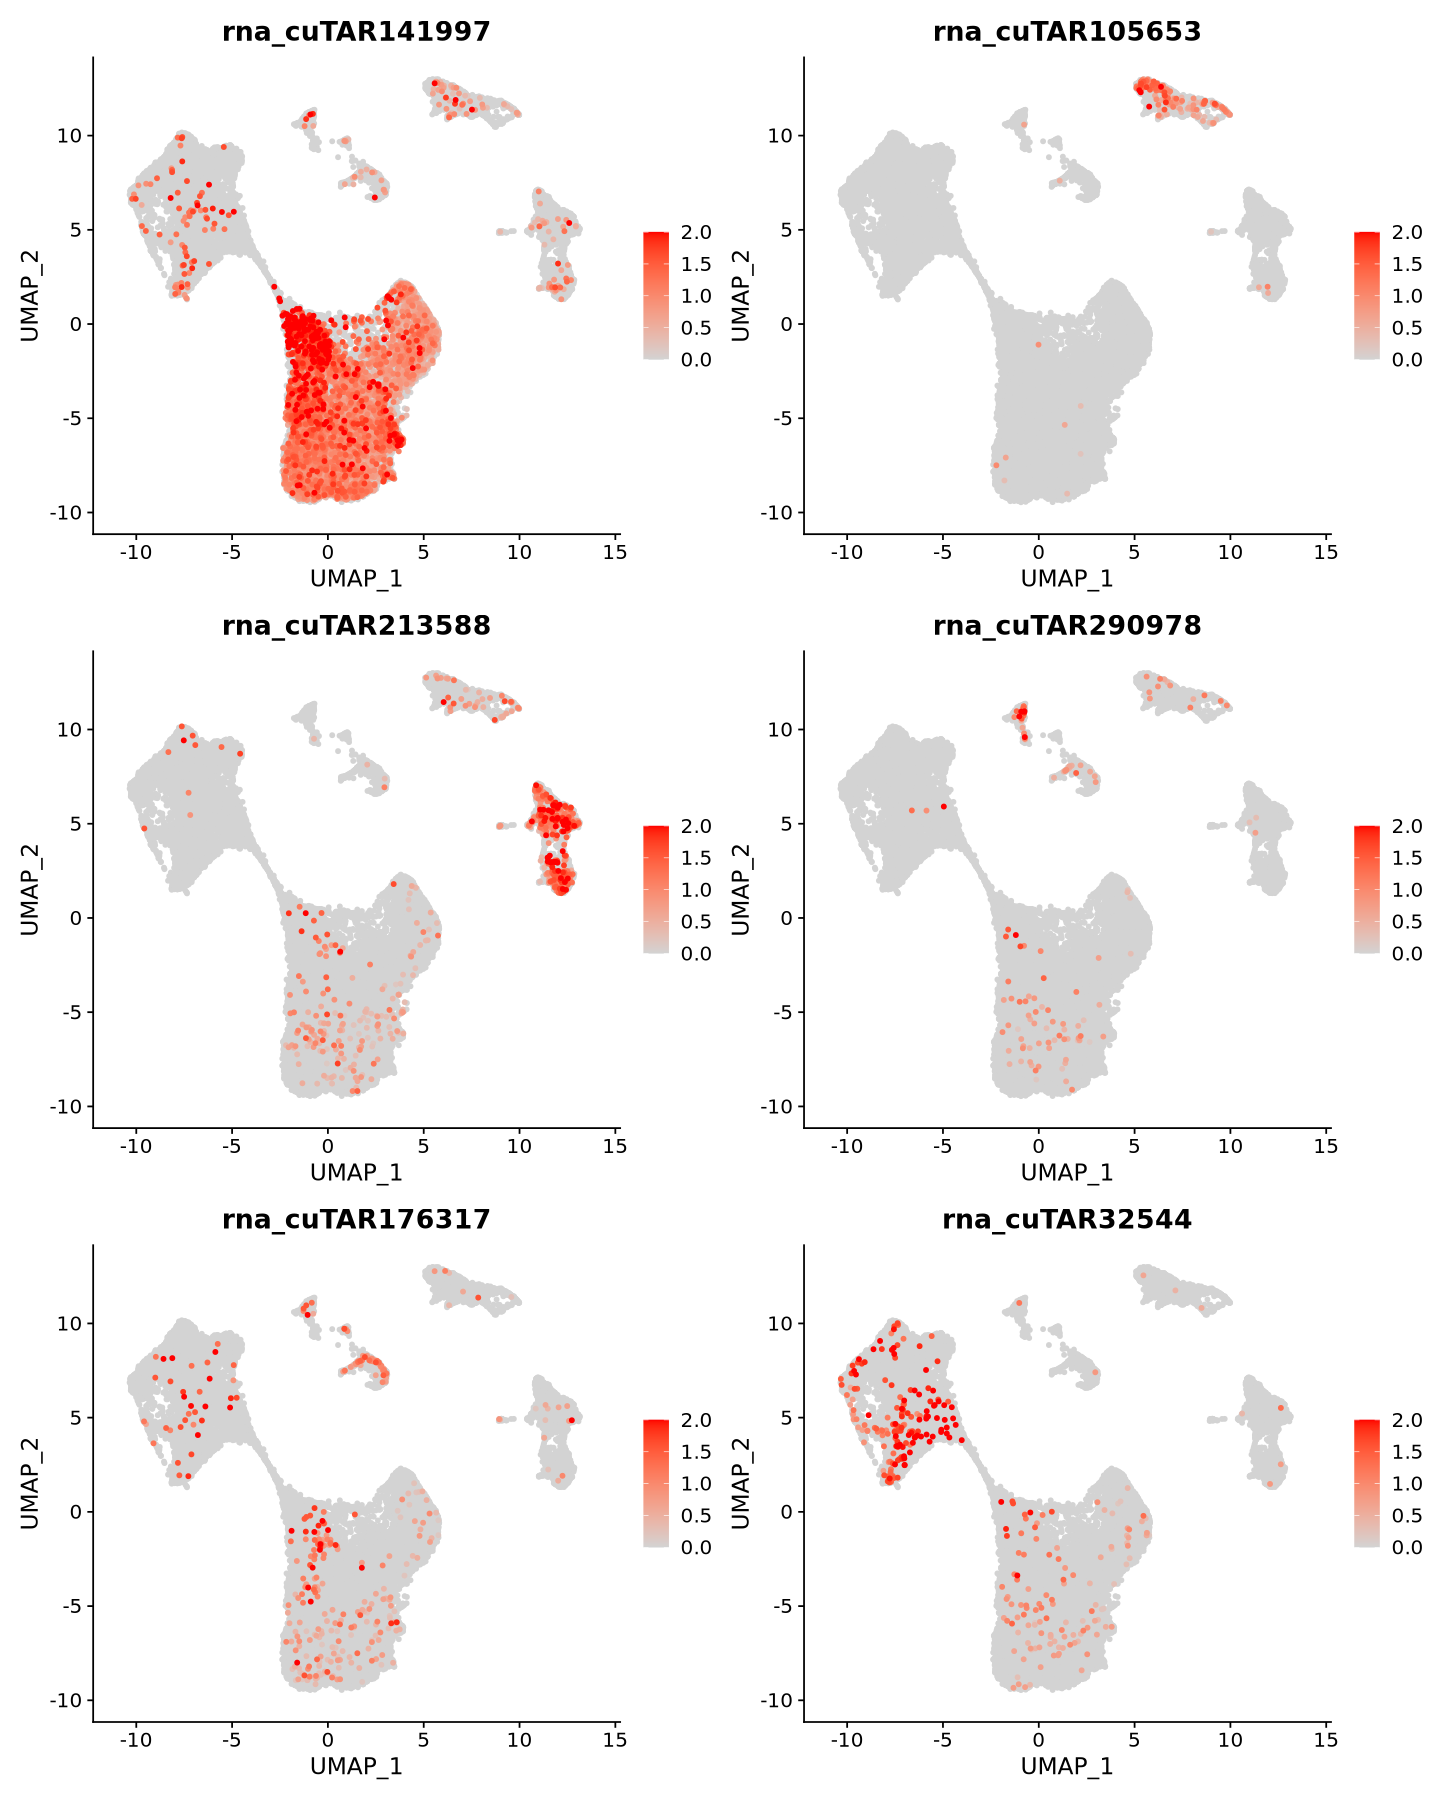

In [7]:
options(repr.plot.width = 12, repr.plot.height = 15)
FeaturePlot(so,features = c("cuTAR141997","cuTAR105653","cuTAR213588","cuTAR290978","cuTAR176317","cuTAR32544"), #cuTAR25417 replaced
               pt.size=1, order=TRUE, cols = c("lightgrey", "red"), max.cutoff=2)

p<-FeaturePlot(so,features =  c("cuTAR141997","cuTAR105653","cuTAR213588","cuTAR290978","cuTAR176317","cuTAR32544"),
               pt.size=1, order=TRUE, cols = c("lightgrey", "red"), max.cutoff=2)

pdf("feature_plots_new2.pdf",width = 12, height = 15)
p
dev.off()

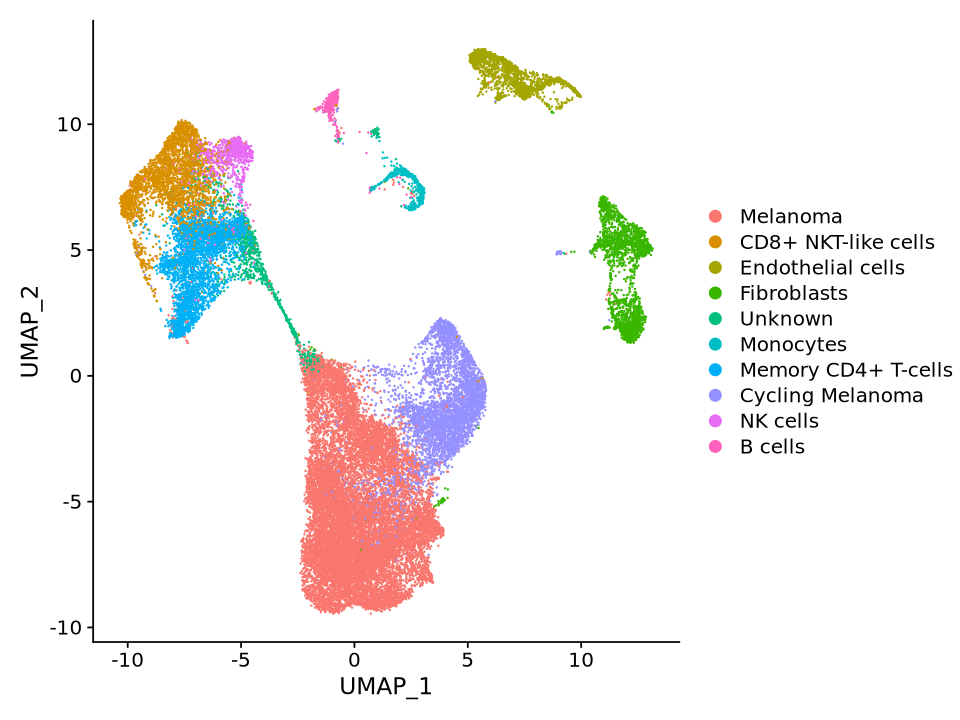

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

DimPlot(so)

In [112]:
options(repr.plot.width = 15, repr.plot.height = 30)
FeaturePlot(so,features = FeaturePlot(so,features = c("cuTAR141997","cuTAR105653","cuTAR213588"),#,"cuTAR25417","cuTAR87331","cuTAR114636"), 
                                      pt.size=1, order=TRUE, cols = c("lightgrey", "red")), split.by = "orig.ident")



Warning message:
“Could not find cuTAR141997 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR105653 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find cuTAR213588 in the default search locations, found in ‘RNA’ assay instead”


ERROR: Error in match(x, table, nomatch = 0L): 'match' requires vector arguments


In [103]:
old_m<-c("cuTAR141997","cuTAR105653","cuTAR213588","cuTAR25417","cuTAR176317","cuTAR114636") # find diffreent bcell marker inplace of cuTAR25417
intersect(up,old_m)

[1] "cuTAR114636" "cuTAR141997" "cuTAR105653" "cuTAR213588" "cuTAR176317"

In [68]:
up_list <- data.frame(Gene = character(), Source_QLF = integer(), stringsAsFactors = FALSE)

for (i in 1:10) {
  # Adjust FDR
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  
  # Add significance classification
  qlf[[i]]$table$Significance <- with(qlf[[i]]$table, 
    ifelse(FDR < fdr_threshold & logFC > logFC_threshold, "Upregulated",
    ifelse(FDR < fdr_threshold & logFC < -logFC_threshold, "Downregulated", "Not Significant")))

  # Select upregulated genes
  upregulated_genes <- qlf[[i]]$table[qlf[[i]]$table$Significance == "Upregulated", ]
  
  # Get top 10 based on lowest FDR and highest logFC
  top_genes <- rownames(upregulated_genes[order(upregulated_genes$FDR, -upregulated_genes$logFC), ][1:10, ])
  
  # Store results in a data frame
  up_list <- rbind(up_list, data.frame(Gene = top_genes, Source_QLF = i))
}

# Print the table
print(up_list)


           Gene Source_QLF
1   cuTAR290978          1
2    cuTAR20326          1
3   cuTAR235985          1
4            NA          1
5          NA.1          1
6          NA.2          1
7          NA.3          1
8          NA.4          1
9          NA.5          1
10         NA.6          1
11  cuTAR102081          2
12  cuTAR158577          2
13  cuTAR203789          2
14   cuTAR32544          2
15   cuTAR13995          2
16  cuTAR114636          2
17   cuTAR67350          2
18  cuTAR179048          2
19   cuTAR14896          2
20   cuTAR21108          2
21   cuTAR30875          3
22   cuTAR23054          3
23  cuTAR291293          3
24   cuTAR94762          3
25  cuTAR262917          3
26   cuTAR90685          3
27  cuTAR191378          3
28  cuTAR141997          3
29  cuTAR135692          3
30  cuTAR231320          3
31  cuTAR105653          4
32   cuTAR73745          4
33  cuTAR295694          4
34    cuTAR3369          4
35  cuTAR136011          4
36  cuTAR258201          4
3

In [72]:
qlf[[1]]$comparison
qlf[[2]]$comparison
qlf[[3]]$comparison
qlf[[4]]$comparison
qlf[[5]]$comparison
qlf[[6]]$comparison
qlf[[7]]$comparison
qlf[[8]]$comparison
qlf[[9]]$comparison
qlf[[10]]$comparison

[1] "Acral1_vs_others"

[1] "Acral2_vs_others"

[1] "Acral5_vs_others"

[1] "Acral6_vs_others"

[1] "Cutaneous1_vs_others"

[1] "NA_vs_others"

[1] "NA_vs_others"

[1] "NA_vs_others"

[1] "NA_vs_others"

[1] "NA_vs_others"

[1] TRUE

Warning message:
“Count matrix has duplicated rownames”


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   16265   263536  1065179  5587675  3349359 62589626 

keep.samples
FALSE  TRUE 
    1    49 

[1] 0.3017323

[1] 0.3017323

,Acral1,Acral2,Acral5,Acral6,Cutaneous1
Int,0.00,0.00,0.00,0.00,0.00
Acral2,-0.25,1.00,-0.25,-0.25,-0.25
Acral5,-0.25,-0.25,1.00,-0.25,-0.25
Acral6,-0.25,-0.25,-0.25,1.00,-0.25
Cutaneous1,-0.25,-0.25,-0.25,-0.25,1.00
CD8+ NKT-like cells,0.00,0.00,0.00,0.00,0.00
Cycling Melanoma,0.00,0.00,0.00,0.00,0.00
Endothelial cells,0.00,0.00,0.00,0.00,0.00
Fibroblasts,0.00,0.00,0.00,0.00,0.00
Melanoma,0.00,0.00,0.00,0.00,0.00


,B cells_vs_others,CD8+ NKT-like cells_vs_others,Cycling Melanoma_vs_others,Endothelial cells_vs_others,Fibroblasts_vs_others
Down,65,276,94,166,128
NotSig,926,879,919,836,937
Up,265,101,243,254,191


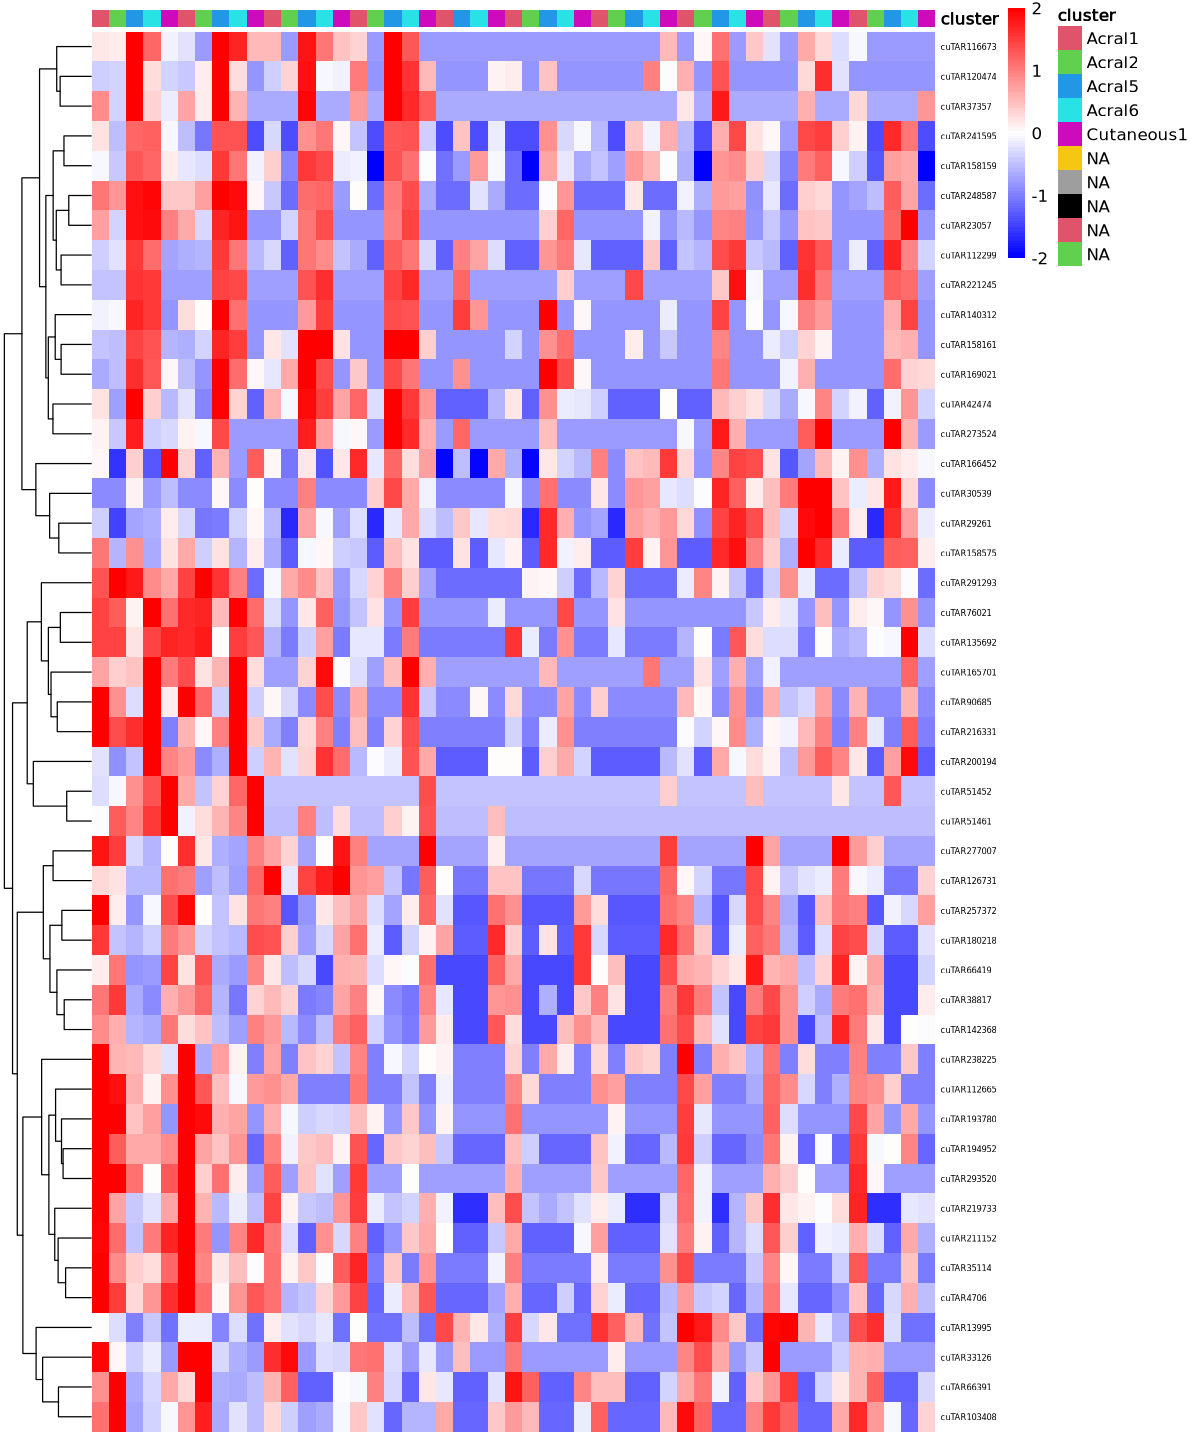

In [6]:
library(edgeR)
so<-readRDS("/QRISdata/Q4386/Supplementary/v2_combined_seurat_obj.rds")
cuTARs_list <- read.table("cuTARs_list.txt", header = TRUE, stringsAsFactors = FALSE)$GENE

DefaultAssay(so)<"RNA"
# Step 1: Load the mapping file
mapping <- read.table("uTAR_to_cuTAR_ID_rename", header = FALSE, sep = "\t", stringsAsFactors = FALSE)
# Step 2: Create a named vector mapping old uTAR IDs to new uTAR IDs
rename_map <- setNames(mapping$V2, mapping$V1)
# Step 3: Extract the current rownames from the Seurat object
current_rownames <- rownames(so@assays$RNA@counts)
# Step 4: Identify the uTAR genes in the current rownames
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
# Step 5: Create a new vector of rownames with the updated names
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
# Step 6: Update the rownames in the Seurat object
rownames(so@assays$RNA@counts) <- new_rownames
#rownames(so@assays$RNA@data) <- new_rownames
#rownames(so@assays$RNA@scale.data)<- new_rownames
# Step 7: Verify the changes

###
current_rownames <- rownames(so@assays$RNA@data)
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
rownames(so@assays$RNA@data) <- new_rownames



current_rownames <- rownames(so@assays$RNA@scale.data)
uTAR_genes <- current_rownames[grep("^uTAR", current_rownames)]
new_rownames <- current_rownames
new_rownames[which(current_rownames %in% uTAR_genes)] <- rename_map[current_rownames[which(current_rownames %in% uTAR_genes)]]
rownames(so@assays$RNA@scale.data) <- new_rownames
#####

y<-Seurat2PB(so,cluster="orig.ident",sample="gene_cell_types")
summary(y$samples$lib.size)

keep.samples<-y$samples$lib.size > 50000 
table(keep.samples) 
#mel_samples<-c("Post Treatment_clusterMelanoma","Post Treatment_clusterCycling Melanoma","Pre Treatment_clusterCycling Melanoma","Pre Treatment_clusterMelanoma") 

#y<-y[,keep.samples]
#Keep only uTARs for DE analysis. Skip to calculate FC for gene-co-exp
uTARs <- rownames(y)[grep("^cuTAR", rownames(y))]
uTARs<-intersect(uTARs,cuTARs_list)
y<-y[uTARs,,keep=FALSE]

#normalization
y<-normLibSizes(y)

#MDS plots
cluster<-as.factor(y$samples$cluster) 


#design matrix
donor<-factor(y$sample$sample)
design<-model.matrix(~cluster+donor)
colnames(design)<-gsub("donor","",colnames(design))
colnames(design)<-gsub("cluster","",colnames(design))
colnames(design)[1]<-"Int"

#dispersion estimates
#Dispersion Estimation
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g


fit<-glmQLFit(y,design,robust=TRUE) 


## Marker gene identification
ncls<-nlevels(cluster) 
contr<-rbind(matrix(1/(1-ncls),ncls,ncls), +matrix(0,ncol(design)-ncls,ncls)) 
diag(contr)<-1 
contr[1,]<-0 
rownames(contr)<-colnames(design) 
colnames(contr)<-levels(cluster)
contr

# Qasi-likelihood f-test for each comprison
qlf<-list() 
for(i in 1:ncls){ 
  qlf[[i]]<-glmQLFTest(fit,contrast=contr[,i]) 
  qlf[[i]]$comparison<-paste0(levels(donor)[i],"_vs_others") 
}

non_mel<-c("B cells","CD8+ NKT-like cells","Endothelial cells","Fibroblasts","Memory CD4+ T-cells","Monocytes","NK cells")        
mel<-c("Cycling Melanoma","Melanoma")


#No.of DE genes for each comparison
dt<-lapply(lapply(qlf,decideTestsDGE),summary) 
dt.all<-do.call("cbind",dt) 
head(dt.all)
#write.table(dt.all,"cluster_wise_uTAR_stats.txt",sep="\t",quote=FALSE,row.names=TRUE)


# Top 20 DE uTARs per cluster
top<-10
topMarkers<-list()
for(i in 1:ncls){ 
  ord<-order(qlf[[i]]$table$PValue,decreasing=FALSE) 
  up<-qlf[[i]]$table$logFC>0 
  topMarkers[[i]]<-rownames(y)[ord[up][1:top]] 
} 
topMarkers<-unique(unlist(topMarkers)) 
#write.table(topMarkers,"topmarkers_edger.txt",sep="\t",row.names = TRUE, quote = FALSE)


# Heat Map
lcpm<-cpm(y,log=TRUE) 
annot<-data.frame(cluster=cluster) 
rownames(annot)<-colnames(y) 
ann_colors<-list(cluster=2:11) 
names(ann_colors$cluster)<-levels(cluster)

options(repr.plot.width = 10, repr.plot.height = 12)
colnames(lcpm)<-gsub("cluster","",colnames(lcpm))



o<-read.csv("order_to_keep_pheatmap_ct.txt",sep="\t",header=FALSE)
desired_order<-o$V1
lcpm_o <- lcpm[,match(desired_order, colnames(lcpm)), drop = FALSE]


rownames(annot)<-gsub("cluster","",rownames(annot))
annot_o <- annot[match(desired_order, rownames(annot)), , drop = FALSE]




pheatmap::pheatmap(lcpm_o[topMarkers,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
#grid.text(levels(annot_o$cluster), x = c(0.25, 0.6), y = c(0.89, 0.89),gp = gpar(fontsize = 10, rot = 45))




In [26]:
colnames(lcpm_o)

[1] "B cells_Acral1"                 "B cells_Acral2"                
 [3] "B cells_Acral5"                 "B cells_Acral6"                
 [5] "B cells_Cutaneous1"             "CD8+ NKT-like cells_Acral1"    
 [7] "CD8+ NKT-like cells_Acral2"     "CD8+ NKT-like cells_Acral5"    
 [9] "CD8+ NKT-like cells_Acral6"     "CD8+ NKT-like cells_Cutaneous1"
[11] "Cycling Melanoma_Acral1"        "Cycling Melanoma_Acral2"       
[13] "Cycling Melanoma_Acral5"        "Cycling Melanoma_Acral6"       
[15] "Cycling Melanoma_Cutaneous1"    "Endothelial cells_Acral1"      
[17] "Endothelial cells_Acral2"       "Endothelial cells_Acral5"      
[19] "Endothelial cells_Acral6"       "Endothelial cells_Cutaneous1"  
[21] "Fibroblasts_Acral1"             "Fibroblasts_Acral2"            
[23] "Fibroblasts_Acral5"             "Fibroblasts_Acral6"            
[25] "Fibroblasts_Cutaneous1"         "Melanoma_Acral1"               
[27] "Melanoma_Acral2"                "Melanoma_Acral5"               
[29] "Melanoma_Acral6"                "Melanoma_Cutaneous1"           
[31] "Memory CD4+ T-cells_Acral1"     "Memory CD4+ T-cells_Acral2"    
[33] "Memory CD4+ T-cells_Acral5"     "Memory CD4+ T-cells_Acral6"    
[35] "Memory CD4+ T-cells_Cutaneous1" "Monocytes_Acral1"              
[37] "Monocytes_Acral2"               "Monocytes_Acral5"              
[39] "Monocytes_Acral6"               "Monocytes_Cutaneous1"          
[41] "NK cells_Acral1"                "NK cells_Acral2"               
[43] "NK cells_Acral5"                "NK cells_Acral6"               
[45] "NK cells_Cutaneous1"            "Unknown_Acral1"                
[47] "Unknown_Acral2"                 "Unknown_Acral5"                
[49] "Unknown_Acral6"                 "Unknown_Cutaneous1"

Total Upregulated Genes Selected: 45 


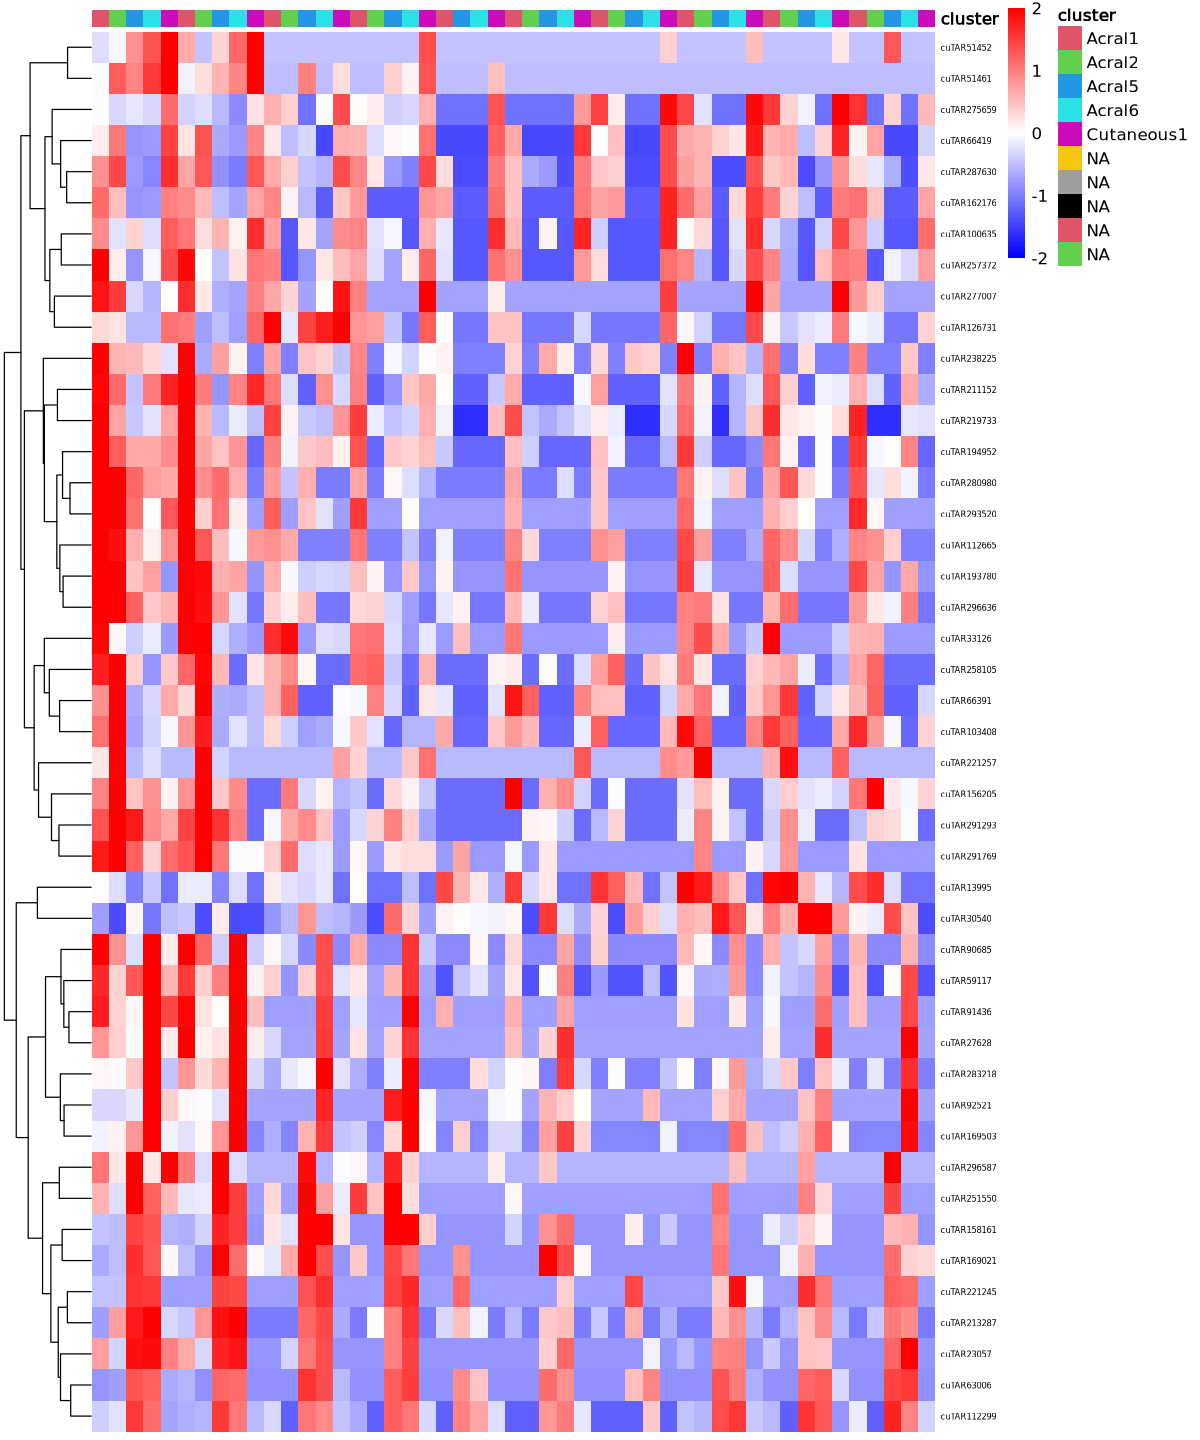

In [79]:
# Define thresholds
logFC_threshold <- 1  # Fold change threshold
fdr_threshold <- 0.05 # FDR threshold

# Initialize an empty vector for upregulated genes
up <- c()

# Process each qlf result from 1 to 10
for (i in 1:5) {
  # Adjust FDR
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  
  # Add significance classification
  qlf[[i]]$table$Significance <- with(qlf[[i]]$table, 
    ifelse(FDR < fdr_threshold & logFC > logFC_threshold, "Upregulated",
    ifelse(FDR < fdr_threshold & logFC < -logFC_threshold, "Downregulated", "Not Significant")))

  # Select upregulated genes
  upregulated_genes <- qlf[[i]]$table[qlf[[i]]$table$Significance == "Upregulated", ]
  
  # Get top 10 based on lowest FDR and highest logFC
  top_genes <- rownames(upregulated_genes[order(upregulated_genes$FDR, -upregulated_genes$logFC), ][1:10, ])
  
  # Append to up while ensuring uniqueness
  up <- unique(c(up, top_genes))
}
up <- intersect(up, rownames(lcpm_o))
# Check the number of selected upregulated genes
cat("Total Upregulated Genes Selected:", length(up), "\n")

# Generate heatmap if there are upregulated genes
if (length(up) > 0) {
  pheatmap::pheatmap(lcpm_o[up,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
} else {
  cat("No upregulated genes found.")
}


In [80]:
up_list <- data.frame(Gene = character(), Source_QLF = integer(), stringsAsFactors = FALSE)

for (i in 1:5) {
  # Adjust FDR
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  
  # Add significance classification
  qlf[[i]]$table$Significance <- with(qlf[[i]]$table, 
    ifelse(FDR < fdr_threshold & logFC > logFC_threshold, "Upregulated",
    ifelse(FDR < fdr_threshold & logFC < -logFC_threshold, "Downregulated", "Not Significant")))

  # Select upregulated genes
  upregulated_genes <- qlf[[i]]$table[qlf[[i]]$table$Significance == "Upregulated", ]
  
  # Get top 10 based on lowest FDR and highest logFC
  top_genes <- rownames(upregulated_genes[order(upregulated_genes$FDR, -upregulated_genes$logFC), ][1:10, ])
  
  # Store results in a data frame
  up_list <- rbind(up_list, data.frame(Gene = top_genes, Source_QLF = i))
}

# Print the table
print(up_list)


          Gene Source_QLF
1  cuTAR211152          1
2   cuTAR33126          1
3  cuTAR193780          1
4  cuTAR238225          1
5  cuTAR194952          1
6  cuTAR219733          1
7  cuTAR112665          1
8  cuTAR280980          1
9   cuTAR13995          1
10 cuTAR293520          1
11  cuTAR66391          2
12 cuTAR291293          2
13 cuTAR291769          2
14 cuTAR296636          2
15 cuTAR258105          2
16  cuTAR33126          2
17 cuTAR156205          2
18  cuTAR13995          2
19 cuTAR103408          2
20 cuTAR221257          2
21  cuTAR63006          3
22 cuTAR158161          3
23 cuTAR296587          3
24 cuTAR221245          3
25 cuTAR112299          3
26  cuTAR23057          3
27 cuTAR213287          3
28 cuTAR251550          3
29  cuTAR30540          3
30 cuTAR169021          3
31  cuTAR63006          4
32  cuTAR23057          4
33  cuTAR92521          4
34 cuTAR283218          4
35  cuTAR59117          4
36 cuTAR213287          4
37 cuTAR169503          4
38  cuTAR914

In [81]:
qlf[[1]]$comparison
qlf[[2]]$comparison
qlf[[3]]$comparison
qlf[[4]]$comparison
qlf[[5]]$comparison


[1] "B cells_vs_others"

[1] "CD8+ NKT-like cells_vs_others"

[1] "Cycling Melanoma_vs_others"

[1] "Endothelial cells_vs_others"

[1] "Fibroblasts_vs_others"

In [76]:
str(qlf)

List of 5
 $ :Formal class 'DGELRT' [package "edgeR"] with 1 slot
  .. ..@ .Data:List of 26
  .. .. ..$ : num [1:1256, 1:14] -8.16 -12.64 -7.28 -6.74 -10.59 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:1256] "cuTAR3369" "cuTAR23067" "cuTAR228568" "cuTAR228569" ...
  .. .. .. .. ..$ : chr [1:14] "Int" "Acral2" "Acral5" "Acral6" ...
  .. .. ..$ : num [1:1256, 1:50] 4.57e-01 3.15e-09 1.11 1.93 8.42e-08 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:1256] "cuTAR3369" "cuTAR23067" "cuTAR228568" "cuTAR228569" ...
  .. .. .. .. ..$ : chr [1:50] "B cells_clusterAcral1" "B cells_clusterAcral2" "B cells_clusterAcral5" "B cells_clusterAcral6" ...
  .. .. ..$ : num [1:1256] 26.3 21.3 20.6 23.2 29.1 ...
  .. .. ..$ : int [1:1256] 19 17 6 6 16 9 9 8 18 19 ...
  .. .. ..$ : logi [1:1256] FALSE FALSE FALSE FALSE FALSE FALSE ...
  .. .. ..$ : chr "levenberg"
  .. .. ..$ : num [1:1256, 1:14] -8.19 -26.99 -7.3 -6.76 -23.7 ...
  .. .. .. ..- attr

In [82]:
ct_up<-up

In [13]:
so<-readRDS("/QRISdata/Q4386/Supplementary/v2_combined_seurat_obj.rds")
y<-Seurat2PB(so,sample="orig.ident",cluster="gene_cell_types")
#mel_samples<-c("Post Treatment_clusterMelanoma","Post Treatment_clusterCycling Melanoma","Pre Treatment_clusterCycling Melanoma","Pre Treatment_clusterMelanoma")
mel_samples<-c('Acral1_clusterCycling Melanoma','Acral1_clusterMelanoma','Acral2_clusterCycling Melanoma','Acral2_clusterMelanoma','Acral5_clusterCycling Melanoma','Acral5_clusterMelanoma','Acral6_clusterCycling Melanoma','Acral6_clusterMelanoma','Cutaneous1_clusterCycling Melanoma','Cutaneous1_clusterMelanoma')
y<-y[,mel_samples]
y<-normLibSizes(y)
donor<-factor(y$sample$sample)
design<-model.matrix(~donor)
colnames(design)<-gsub("donor","",colnames(design))
colnames(design)<-gsub("cluster","",colnames(design))
colnames(design)[1]<-"Int"
#dispersion estimates
#Dispersion Estimation
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion
fit<-glmQLFit(y,design,robust=TRUE)
ncls<-nlevels(donor)
contr<-rbind(matrix(1/(1-ncls),ncls,ncls), +matrix(0,ncol(design)-ncls,ncls))
diag(contr)<-1
contr[1,]<-0
rownames(contr)<-colnames(design)
colnames(contr)<-colnames(design)
qlf<-list()
for(i in 1:ncls){
  qlf[[i]]<-glmQLFTest(fit,contrast=contr[,i])
  qlf[[i]]$comparison<-paste0(levels(donor)[i],"_vs_others")
}

[1] 0.1099619

In [20]:
grep("PMEL",rownames(qlf[[2]]$table))
grep("\\buTAR97\\b",rownames(qlf[[2]]$table))


[1] 20955

[1] 34821

In [21]:

qlf[[2]]$table[20955,]
qlf[[2]]$table[34821,]


,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
PMEL,2.82702,10.94734,210.1406,6.674006e-13


,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
uTAR97,1.36618,8.346152,27.04697,3.028114e-05


In [67]:
qlf[[1]]

An object of class "DGELRT"
$coefficients
                  Int   Acral2    Acral5    Acral6 Cutaneous1
MIR1302-2HG -18.98042 0.000000 2.1230855 2.4363204   0.000000
FAM138A     -18.98042 0.000000 0.0000000 0.0000000   0.000000
OR4F5       -18.98042 0.000000 1.7772218 0.0000000   0.000000
AL627309.1  -15.69716 0.926702 0.9631479 0.9188241  -3.283258
AL627309.3  -18.98042 0.000000 0.0000000 0.0000000   0.000000
34848 more rows ...

$fitted.values
            Acral1_clusterCycling Melanoma Acral1_clusterMelanoma
MIR1302-2HG                      0.0000000                 0.0000
FAM138A                          0.0000000                 0.0000
OR4F5                            0.0000000                 0.0000
AL627309.1                       0.8346833                 5.2199
AL627309.3                       0.0000000                 0.0000
            Acral2_clusterCycling Melanoma Acral2_clusterMelanoma
MIR1302-2HG                       0.000000               0.000000
FAM138A               

In [18]:
tail(qlf[[2]]$table)

,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
uTAR994,1.01593425,1.21868886,5.99721720,0.022511903
uTAR995,0.58254566,0.42510968,2.06235501,0.164754571
uTAR996,-0.05706567,3.34286182,0.04646975,0.831265501
uTAR997,-2.44869770,1.34599891,22.10496167,0.000100881
uTAR998,0.07251041,-1.16280602,0.01259169,0.911573908
uTAR999,1.40629210,-0.06657192,11.53440831,0.002488651


In [56]:

pre_fc<-FoldChange(so,ident.1 = c("Melanoma","Cycling Melanoma"),ident.2 = c("Endothelial cells","Fibroblasts","Memory CD4+ T-cells",
                                                                             "CD8+ NKT-like cells","Monocytes"))
pre_fc[c(341,339),]

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>
PMEL,4.176502,0.899,0.652
uTAR97,3.886249,0.513,0.489


In [24]:
levels(so)

[1] "Melanoma"            "CD8+ NKT-like cells" "Endothelial cells"  
 [4] "Fibroblasts"         "Unknown"             "Monocytes"          
 [7] "Memory CD4+ T-cells" "Cycling Melanoma"    "NK cells"           
[10] "B cells"

In [26]:
pre_fc

,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>
FDCSP,4.0319629,0.749,0.832
DCN,-6.7759355,0.187,0.301
CXCL14,-2.7592375,0.239,0.297
ACTA2,-4.6766699,0.573,0.519
COL1A1,-7.6364983,0.373,0.571
uTAR941,2.3006754,0.152,0.175
TAGLN,-6.1584406,0.425,0.620
LUM,-7.5526101,0.253,0.344
ACKR1,-7.2048410,0.312,0.455


In [41]:
grep("PMEL",rownames(pre_fc))
grep("MLANA",rownames(pre_fc))
grep("\\buTAR97\\b",rownames(pre_fc))


[1] 341

[1] 1458

[1] 339

,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>
PMEL,4.084944,0.899,0.656
uTAR97,3.269737,0.513,0.484


In [49]:

fc<-FoldChange(so,ident.1 = c("Cycling Melanoma"), ident.2= c("Endothelial cells","Fibroblasts","Memory CD4+ T-cells",
                                                                             "CD8+ NKT-like cells","Monocytes","NK cells","B cells"))

#fc<-FoldChange(so,ident.1 = c("Melanoma")) #, ident.2 = c("Cycling Melanoma"))
fc[c(341,339, 1458),]

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>
PMEL,3.370845,0.848,0.670
uTAR97,3.262352,0.422,0.486
MLANA,3.339686,0.924,0.589


In [61]:
# Compare "Cycling Melanoma" vs others
markers <- FindMarkers(
  so,
  ident.1 = "Cycling Melanoma",
  ident.2 = c("Endothelial cells","Fibroblasts","Memory CD4+ T-cells",
              "CD8+ NKT-like cells","Monocytes","NK cells","B cells","Unknown"))

# markers is a data.frame with columns: p_val, avg_log2FC, pct.1, pct.2, p_val_adj
markers[c(156, 244, 1150), ]


Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRBV10-1,0.000000e+00,-5.086813,0.015,0.348,0.000000e+00
PMEL,0.000000e+00,3.264185,0.848,0.656,0.000000e+00
CPXM1,1.257719e-46,-5.076140,0.127,0.322,2.515438e-43


In [62]:
grep("PMEL",rownames(markers))
grep("MLANA",rownames(markers))
grep("\\buTAR97\\b",rownames(markers))


[1] 244

[1] 156

[1] 1150

In [63]:
markers[c(156, 244, 1150), ]


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MLANA,0.00000e+00,3.149883,0.924,0.577,0.000000e+00
PMEL,0.00000e+00,3.264185,0.848,0.656,0.000000e+00
uTAR97,5.80363e-49,2.532180,0.422,0.484,1.160726e-45


In [76]:
# Load the Seurat object
#so <- readRDS("/QRISdata/Q4386/Supplementary/v2_combined_seurat_obj.rds")

# Convert Seurat object to a pseudo-bulk object
y <- Seurat2PB(so, sample = "orig.ident", cluster = "gene_cell_types")

# Normalize library sizes (no subsetting to keep all cell types)
y <- normLibSizes(y)

# Debug: Check available cell types
print(unique(y$sample$cluster))

# Define cell type factor
cell_type <- factor(y$sample$cluster)

# Create design matrix based on cell types
design <- model.matrix(~0 + cell_type) # No intercept to treat each cell type as a group
colnames(design) <- gsub("cell_type", "", colnames(design))

# Debug: Check design matrix
print(colnames(design))

# Dispersion estimation
y <- estimateDisp(y, design, robust = TRUE)
print(y$common.dispersion)

# Fit the quasi-likelihood model
fit <- glmQLFit(y, design, robust = TRUE)

# Define cell types of interest
mel_cell_types <- c("Melanoma", "Cycling Melanoma")
other_cell_types <- setdiff(colnames(design), mel_cell_types)

# Debug: Check cell types
print(mel_cell_types)
print(other_cell_types)

# Check if there are non-melanoma cell types
if (length(other_cell_types) == 0) {
  stop("No non-melanoma cell types found for comparison.")
}

# Create contrast matrix for Melanoma and Cycling Melanoma vs. others
n_mel <- length(mel_cell_types)
contr <- matrix(0, nrow = ncol(design), ncol = n_mel)
rownames(contr) <- colnames(design)
colnames(contr) <- paste0(mel_cell_types, "_vs_others")

# Fill contrast matrix
for (i in 1:n_mel) {
  contr[mel_cell_types[i], i] <- 1
  contr[other_cell_types, i] <- -1 / length(other_cell_types) # Average of other cell types
}

# Debug: Check contrast matrix
print(contr)

# Perform differential expression testing
qlf <- list()
for (i in 1:n_mel) {
  qlf[[i]] <- glmQLFTest(fit, contrast = contr[, i])
  qlf[[i]]$comparison <- paste0(mel_cell_types[i], "_vs_others")
}

 [1] "B cells"             "CD8+ NKT-like cells" "Cycling Melanoma"   
 [4] "Endothelial cells"   "Fibroblasts"         "Melanoma"           
 [7] "Memory CD4+ T-cells" "Monocytes"           "NK cells"           
[10] "Unknown"            
 [1] "B cells"             "CD8+ NKT-like cells" "Cycling Melanoma"   
 [4] "Endothelial cells"   "Fibroblasts"         "Melanoma"           
 [7] "Memory CD4+ T-cells" "Monocytes"           "NK cells"           
[10] "Unknown"            
[1] 0.4572932
[1] "Melanoma"         "Cycling Melanoma"
[1] "B cells"             "CD8+ NKT-like cells" "Endothelial cells"  
[4] "Fibroblasts"         "Memory CD4+ T-cells" "Monocytes"          
[7] "NK cells"            "Unknown"            
                    Melanoma_vs_others Cycling Melanoma_vs_others
B cells                         -0.125                     -0.125
CD8+ NKT-like cells             -0.125                     -0.125
Cycling Melanoma                 0.000                      1.000
Endothelial 

In [80]:
qlf[[1]]$table

,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,5.604259e-01,-1.2110073,5.258894e-01,4.740953e-01
FAM138A,-1.281371e-15,-1.3124672,0.000000e+00,1.000000e+00
OR4F5,3.695546e-01,-1.2979862,2.660528e-01,6.120188e-01
AL627309.1,7.705324e-01,-0.4510456,7.772113e-01,3.816561e-01
AL627309.3,-1.281371e-15,-1.3124672,0.000000e+00,1.000000e+00
AL627309.2,-1.281371e-15,-1.3048545,1.533890e-07,9.996922e-01
AL627309.4,-1.281371e-15,-1.3124672,0.000000e+00,1.000000e+00
AL732372.1,-1.281371e-15,-1.3124672,0.000000e+00,1.000000e+00
OR4F29,-1.281371e-15,-1.3124672,0.000000e+00,1.000000e+00


In [84]:
grep("MLANA",rownames(qlf[[2]]$table))

grep("PMEL",rownames(qlf[[2]]$table))
grep("\\buTAR97\\b",rownames(qlf[[2]]$table))

qlf[[2]]$table[c(15799,20955,34821),]


[1] 15799

[1] 20955

[1] 34821

,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
MLANA,3.365920,8.960101,32.70091,4.614408e-07
PMEL,3.855157,9.207032,51.65940,1.737855e-09
uTAR97,3.996518,6.813919,97.20065,2.254372e-14
